In [1]:
# Librerías básicas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set

<function seaborn.rcmod.set(*args, **kwargs)>

# El módulo Statsmodels

Statsmodels es un módulo de Python que ofrece clases y funciones de varios modelos estadísticos, así como pruebas de hipótesis 
y análisis exploratorio de datos. La documentación se encuentra en <a href='https://www.statsmodels.org/stable/index.html'>statsmodels.org</a>. 

In [2]:
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose

# Fuentes de datos interesantes

## API de Yahoo finance

Yahoo Finance tiene una API que permite descargar información financiera para realizar análisis. La página web original de la documentación ya no existe. Sin embargo, existen algunas páginas de documentación no oficial como <a href= 'https://github.com/mxbi/yahoo-finance-api.git'> este repositorio en GitHub, </a> o <a href='https://python-yahoofinance.readthedocs.io/en/latest/api.html'> esta página de documentación the ReadTheDocs </a>.

In [3]:
# Instalación de yfinance
%pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Se importa la librería yfinance
import yfinance

In [5]:
df_yfinance_raw = yfinance.download(
    tickers = "^GSPC",
    start = "1994-01-07",
    interval = "1d",
    group_by = 'ticker',
    auto_adjust = True
)

[*********************100%***********************]  1 of 1 completed


In [6]:
df_yfinance_raw.head()

,Open,High,Low,Close,Volume
Date,,,,,
1994-01-07,467.089996,470.260010,467.029999,469.899994,324920000
1994-01-10,469.899994,475.269989,469.549988,475.269989,319490000
1994-01-11,475.269989,475.279999,473.269989,474.130005,305490000
1994-01-12,474.130005,475.059998,472.140015,474.170013,310690000
1994-01-13,474.170013,474.170013,471.799988,472.470001,277970000


In [7]:
df_yfinance = df_yfinance_raw.copy()

In [8]:
df_yfinance['spx'] = df_yfinance.Close

In [9]:
df_yfinance = df_yfinance.asfreq('b')

In [10]:
df_yfinance.head()

,Open,High,Low,Close,Volume,spx
Date,,,,,,
1994-01-07,467.089996,470.260010,467.029999,469.899994,324920000.0,469.899994
1994-01-10,469.899994,475.269989,469.549988,475.269989,319490000.0,475.269989
1994-01-11,475.269989,475.279999,473.269989,474.130005,305490000.0,474.130005
1994-01-12,474.130005,475.059998,472.140015,474.170013,310690000.0,474.170013
1994-01-13,474.170013,474.170013,471.799988,472.470001,277970000.0,472.470001


In [11]:
df_yfinance = df_yfinance.fillna(method = 'ffill')

## Algunos archivos csv con datos

En <a href='https://github.com/jbrownlee/Datasets.git'>este repositorio de GitHub</a> se encuentran muchos archivos .csv con datos apropiados para ejercicios de aprendizaje de máquina y series de tiempo. En este notebook utilizaremos el archivo 'airline_passengers.csv'.

In [12]:
df_airline = pd.read_csv('airline_passengers.csv',index_col = 'Month', parse_dates = True)

In [13]:
df_airline.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [109]:
len(df_airline)

144

## Datos que vienen con la librería statsmodels
La librería <a href='https://www.statsmodels.org/stable/index.html'>statsmodels</a> tiene varios conjuntos de datos incorporados.
En este notebook, utilizaremos el dataset 'macrodata', que trae datos macroeconómicos de EEUU.

In [14]:
import statsmodels.api as sm

In [15]:
df_macrodata = sm.datasets.macrodata.load_pandas().data

In [16]:
df_macrodata.index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1','2009Q3'))

In [17]:
df_macrodata.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


## Datos de simulados de ventas

In [18]:
df_ventas = pd.read_excel('Datos_clase_1.xlsx', index_col = 'Fecha', parse_dates = True)

In [19]:
df_ventas.head()

,Ventas
Fecha,
2023-01-01,12900.965726
2023-01-02,14962.847415
2023-01-03,17328.133221
2023-01-04,19080.675831
2023-01-05,16665.614172


# Diferenciación

## Diferenciación de primer orden

In [20]:
df_ventas['d1a'] = df_ventas['Ventas']-df_ventas['Ventas'].shift(1)

In [21]:
df_ventas.head()

,Ventas,d1a
Fecha,,
2023-01-01,12900.965726,NaN
2023-01-02,14962.847415,2061.881689
2023-01-03,17328.133221,2365.285806
2023-01-04,19080.675831,1752.542610
2023-01-05,16665.614172,-2415.061659


In [22]:
df_ventas['d1b']=df_ventas['Ventas'].diff()

In [23]:
df_ventas.head()

,Ventas,d1a,d1b
Fecha,,,
2023-01-01,12900.965726,NaN,NaN
2023-01-02,14962.847415,2061.881689,2061.881689
2023-01-03,17328.133221,2365.285806,2365.285806
2023-01-04,19080.675831,1752.542610,1752.542610
2023-01-05,16665.614172,-2415.061659,-2415.061659


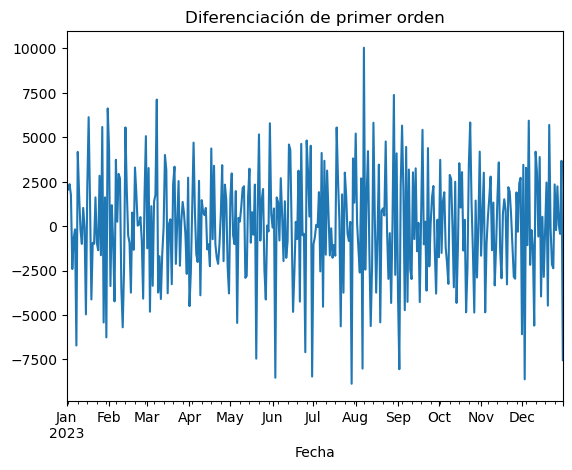

In [24]:
df_ventas['d1b'].plot(title="Diferenciación de primer orden");

## Diferenciación de segundo orden

In [25]:
df_ventas['d2']=df_ventas['d1a'].diff()

In [26]:
df_ventas.head()

,Ventas,d1a,d1b,d2
Fecha,,,,
2023-01-01,12900.965726,NaN,NaN,NaN
2023-01-02,14962.847415,2061.881689,2061.881689,NaN
2023-01-03,17328.133221,2365.285806,2365.285806,303.404117
2023-01-04,19080.675831,1752.542610,1752.542610,-612.743196
2023-01-05,16665.614172,-2415.061659,-2415.061659,-4167.604269


# Ruido blanco

In [27]:
wn = np.random.normal(loc = df_yfinance['spx'].mean(),scale = df_yfinance['spx'].std(),size = len(df_yfinance))

In [28]:
df_yfinance['wn'] = wn

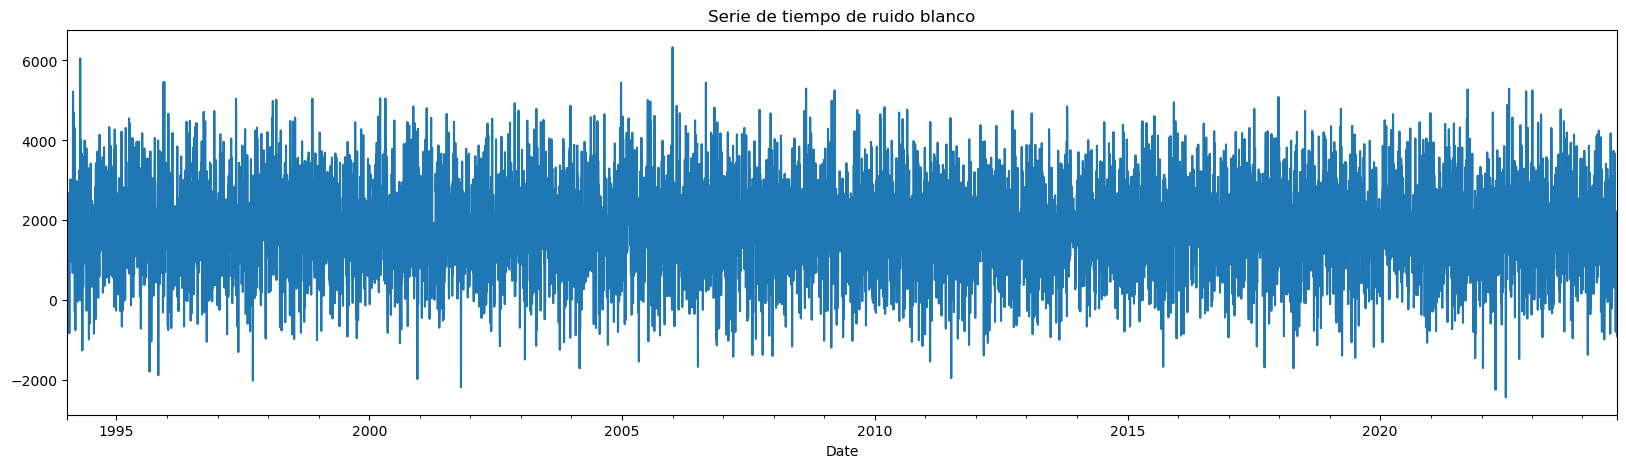

In [29]:
df_yfinance.wn.plot(figsize = (20,5))
plt.title("Serie de tiempo de ruido blanco")
plt.show()

# Caminata aleatoria

In [30]:
steps = np.random.choice([-10,10],size = len(df_yfinance))

In [31]:
steps[0]=0

In [32]:
rw = df_yfinance['spx'].mean()+np.cumsum(steps)

In [33]:
df_yfinance['rw'] = rw

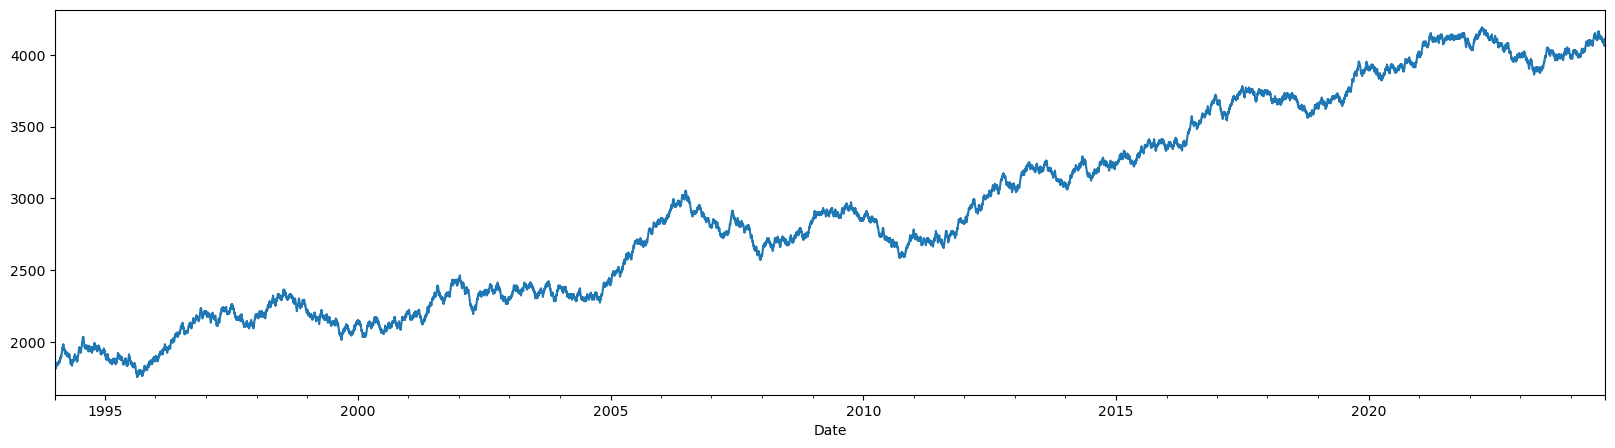

In [34]:
df_yfinance['rw'].plot(figsize=(20,5));

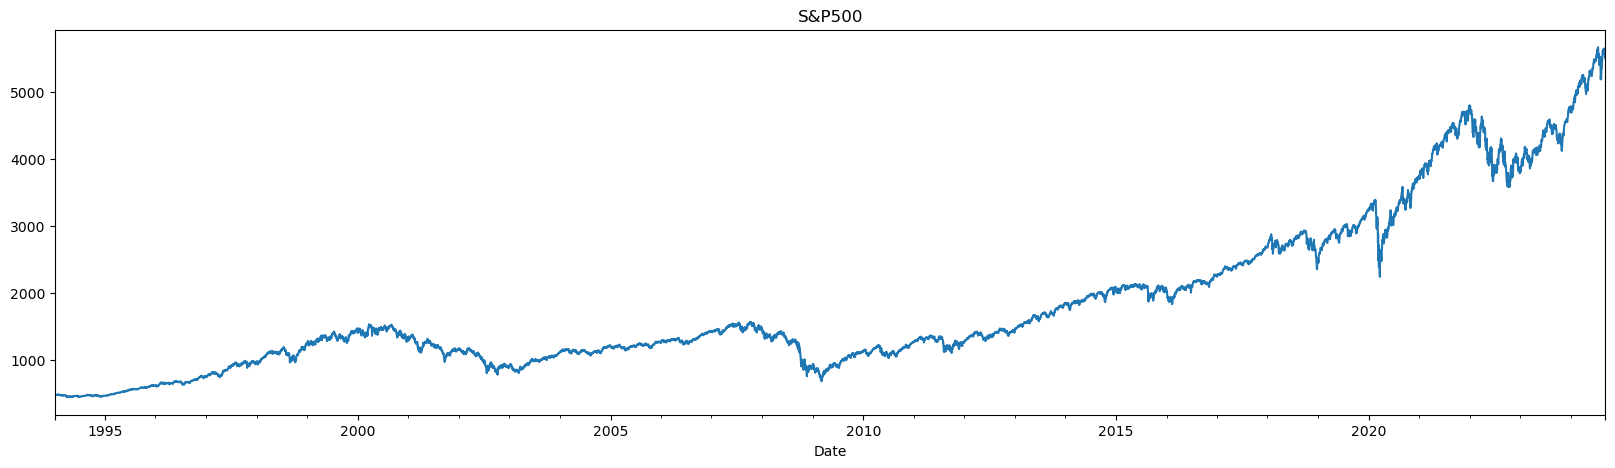

In [35]:
df_yfinance['spx'].plot(figsize=(20,5))
plt.title("S&P500")
plt.show()

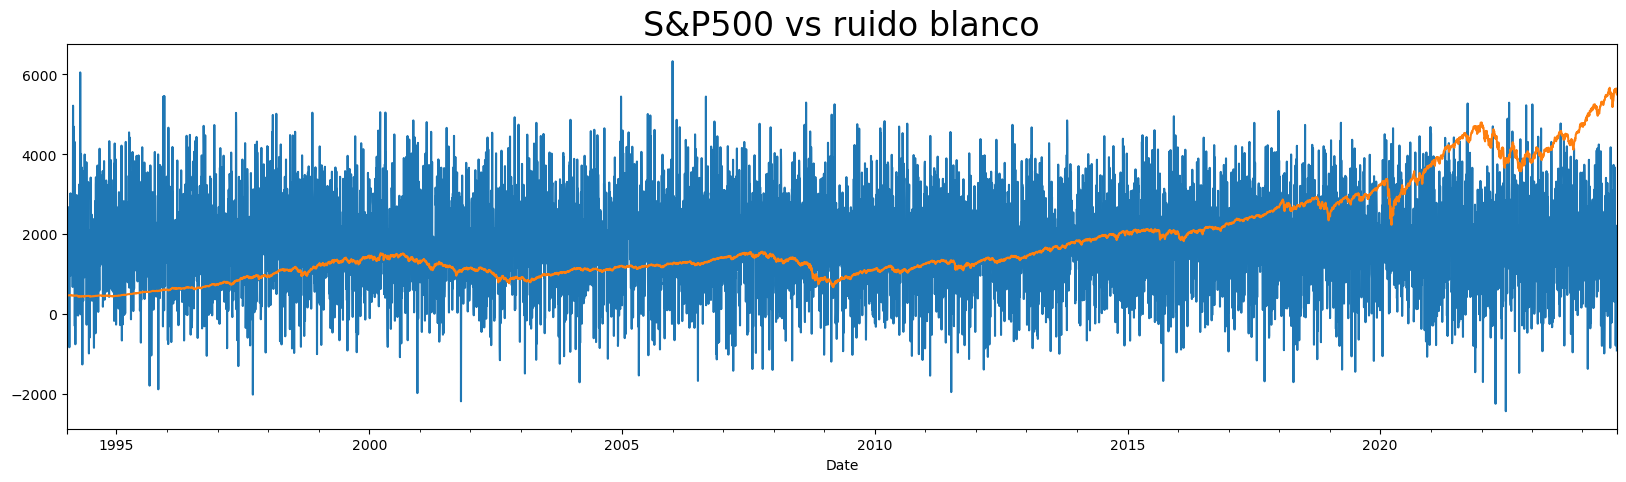

In [36]:
df_yfinance.wn.plot(figsize=(20,5))
df_yfinance['spx'].plot()
plt.title("S&P500 vs ruido blanco", size = 24)
plt.show()

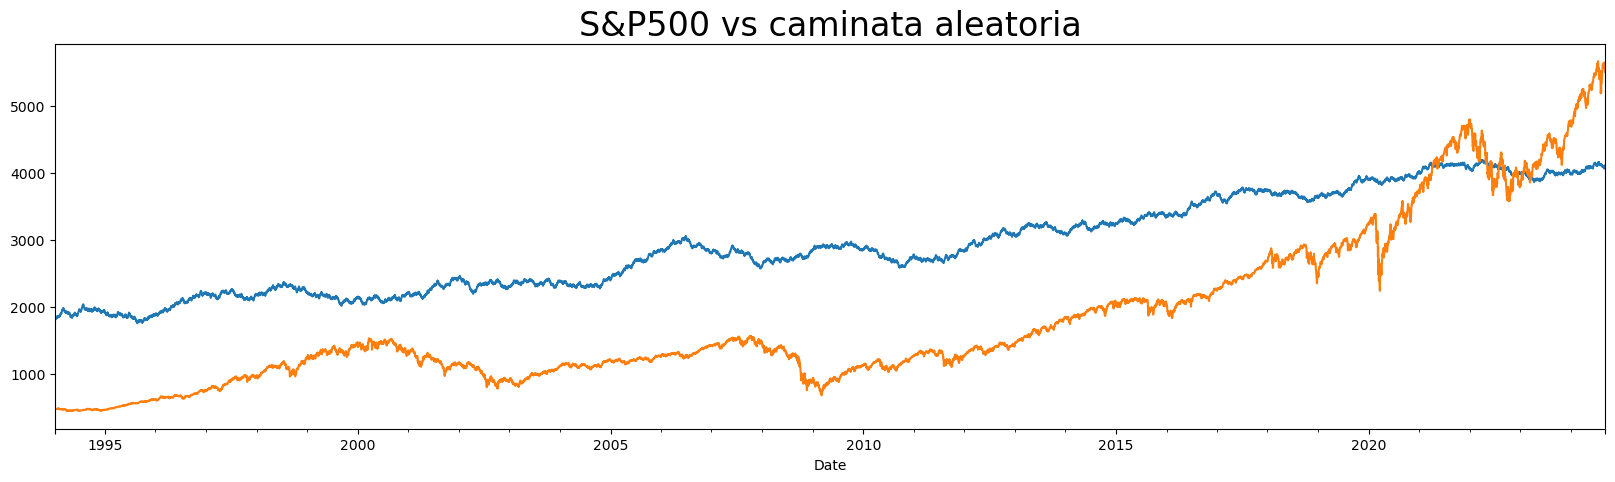

In [37]:
df_yfinance.rw.plot(figsize=(20,5))
df_yfinance['spx'].plot()
plt.title("S&P500 vs caminata aleatoria", size = 24)
plt.show()

# Descomposición de Hodrick-Prescott

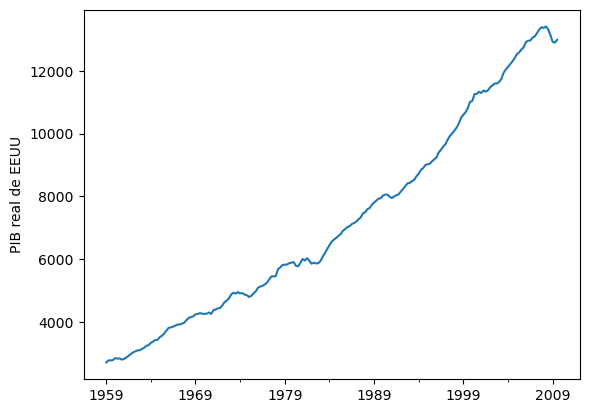

In [38]:
ax = df_macrodata['realgdp'].plot()
ax.autoscale(axis='x')
ax.set(ylabel='PIB real de EEUU');

In [39]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [40]:
# Se realiza la descomposición
gdp_cycle, gdp_trend = hpfilter(df_macrodata['realgdp'],lamb=1600)

In [41]:
spx_cycle, spx_trend = hpfilter(df_yfinance['spx'],lamb=1600)

In [42]:
df_macrodata['trend'] = gdp_trend

In [62]:
df_macrodata['trend'].head(10)

1959-03-31    2670.837085
1959-06-30    2698.712468
1959-09-30    2726.612545
1959-12-31    2754.612067
1960-03-31    2782.816333
1960-06-30    2811.349758
1960-09-30    2840.377312
1960-12-31    2870.078365
1961-03-31    2900.631438
1961-06-30    2932.172890
Name: trend, dtype: float64

In [43]:
df_yfinance['trend'] = spx_trend

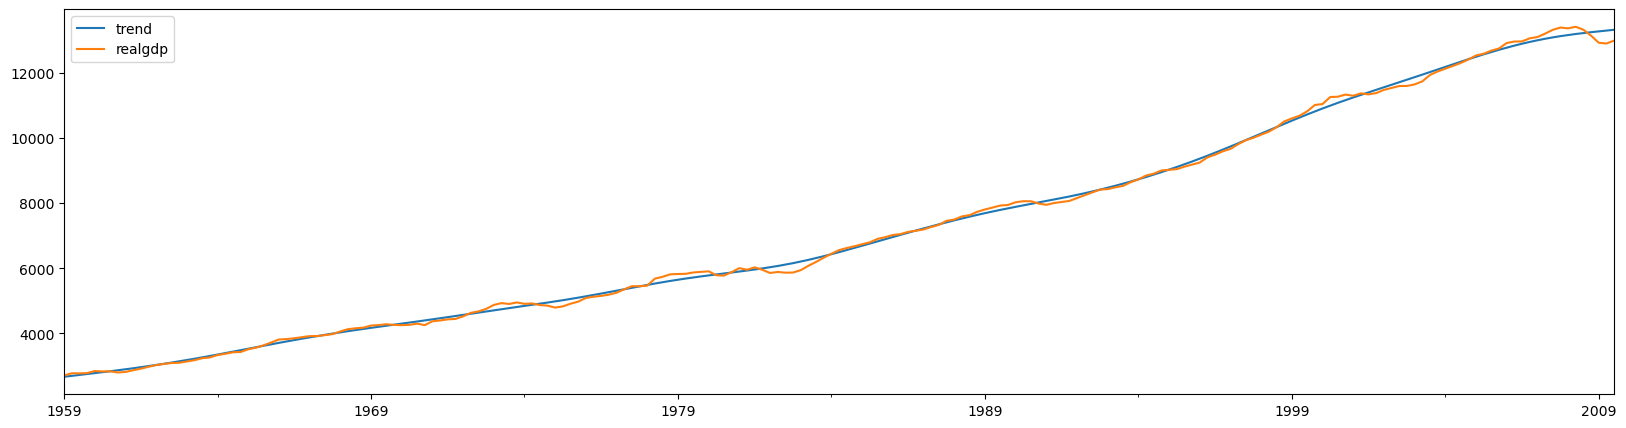

In [44]:
df_macrodata[['trend', 'realgdp']].plot(figsize=(20,5));

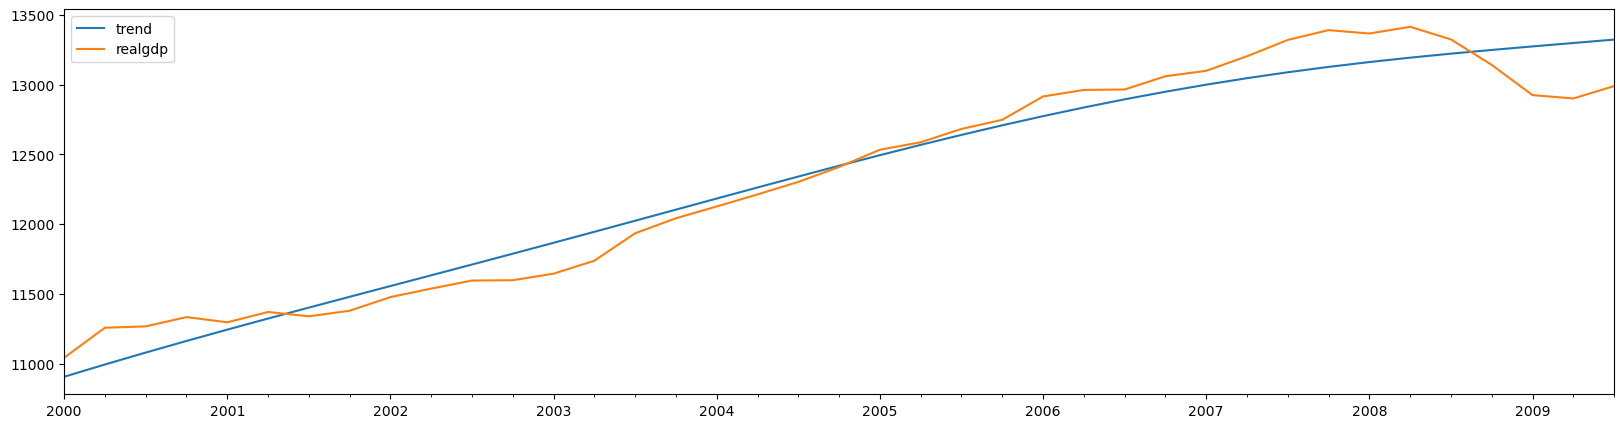

In [45]:
df_macrodata[['trend', 'realgdp']]['2000-03-31':].plot(figsize=(20,5)).autoscale(axis='x',tight=True);

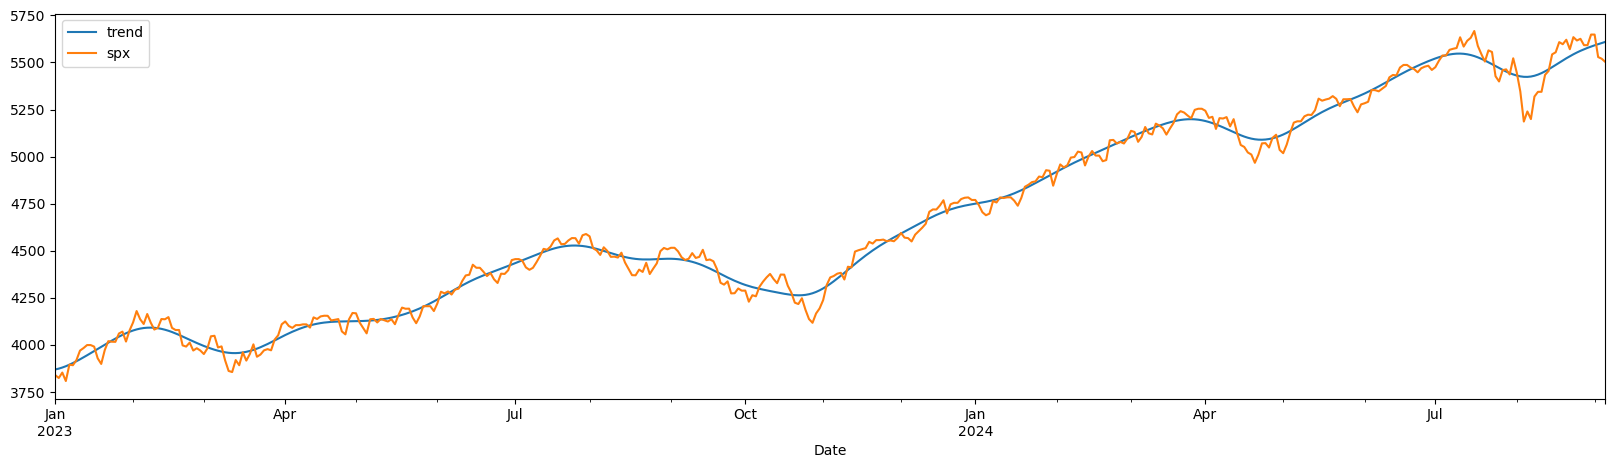

In [46]:
df_yfinance[['trend', 'spx']]['2023-01-01':].plot(figsize=(20,5));

In [47]:
df_macrodata['cycle'] = gdp_cycle

In [48]:
df_yfinance['cycle'] = spx_cycle

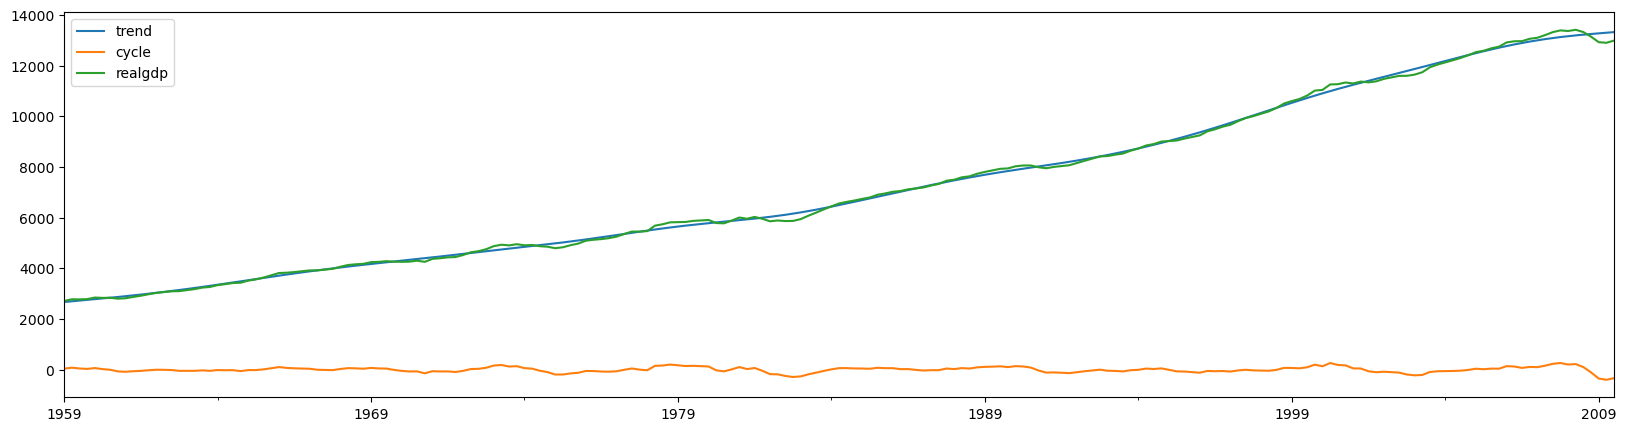

In [49]:
df_macrodata[['trend','cycle','realgdp']].plot(figsize=(20,5)).autoscale(axis='x',tight=True);

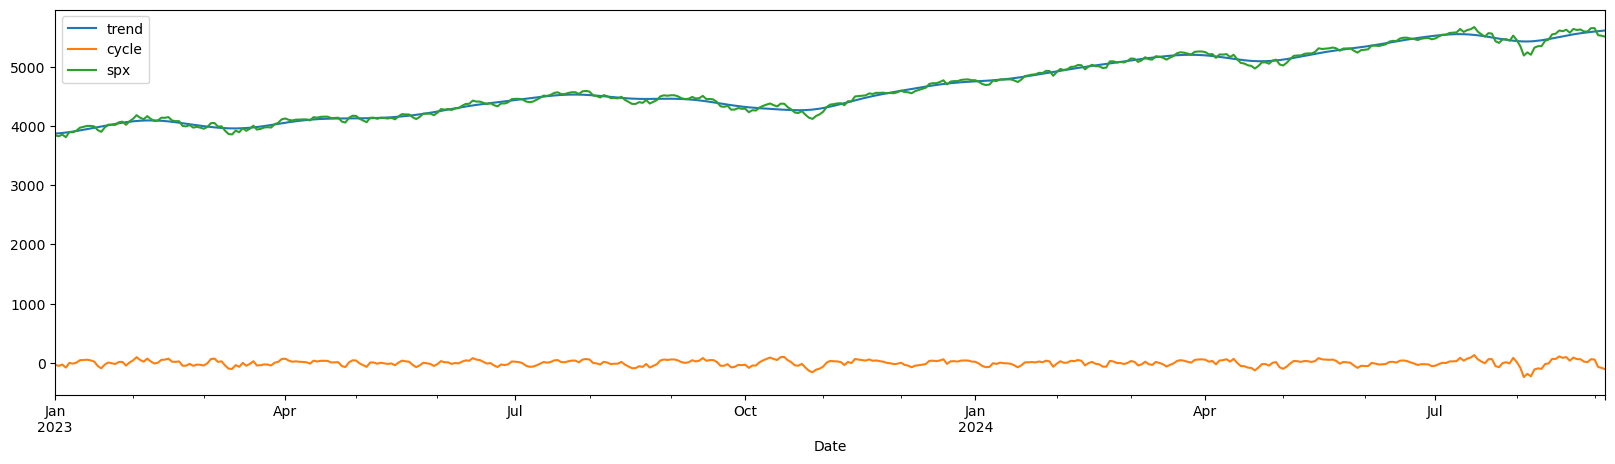

In [50]:
df_yfinance[['trend','cycle', 'spx']]['2023-01-01':].plot(figsize=(20,5));

# Descomposición ETS (Error-Trend-Seasonality)

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose

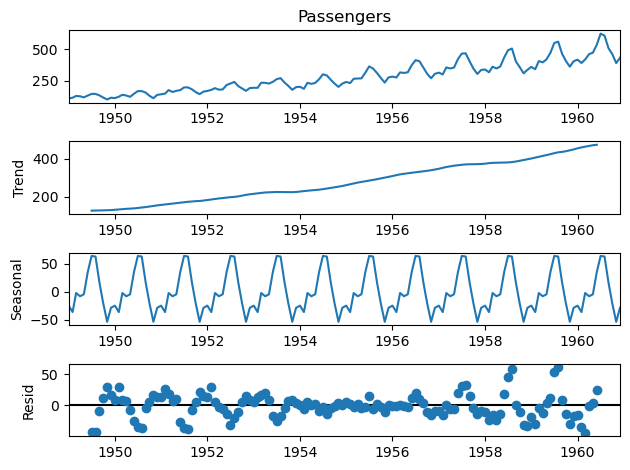

In [52]:
result = seasonal_decompose(df_airline['Passengers'],model = 'aditive')
result.plot();

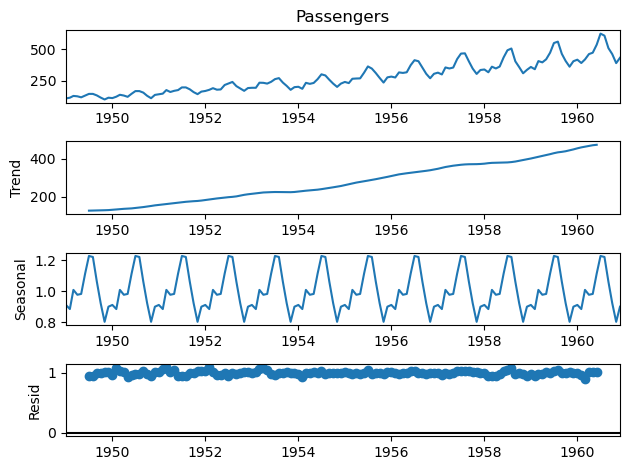

In [53]:
result = seasonal_decompose(df_airline['Passengers'],model = 'multiplicative')
result.plot();

In [68]:
df_aux = result.resid

In [69]:
df_aux.head(10)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01    0.951664
1949-08-01    0.953401
1949-09-01    1.002220
1949-10-01    1.004028
Name: resid, dtype: float64

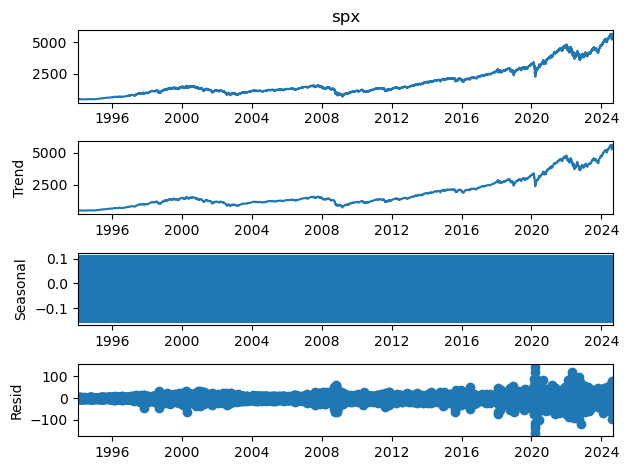

In [54]:
result_spx = seasonal_decompose(df_yfinance['spx'],model = 'aditive')
result_spx.plot();

# SMA (Simple Moving Average)
Es la media móvil que se calcula con los cálculos de ventana móvil

In [55]:
df_airline['6-month-SMA'] = df_airline['Passengers'].rolling(window = 6).mean()
df_airline['12-mont-SMA'] = df_airline['Passengers'].rolling(window = 12).mean()

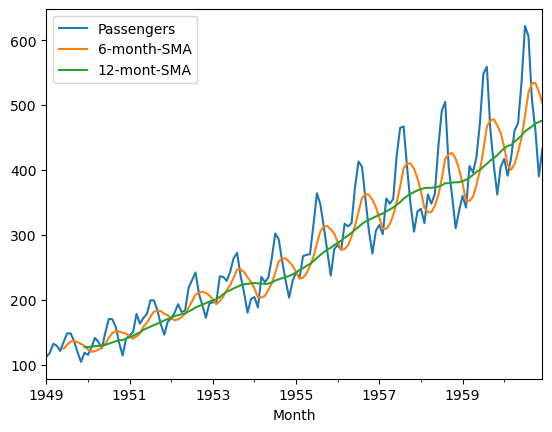

In [58]:
df_airline[['Passengers','6-month-SMA','12-mont-SMA']].plot();

# EWMA Exponentially Weighted Moving Average

In [59]:
df_airline['EWMA12'] = df_airline['Passengers'].ewm(span=12,adjust = False).mean()

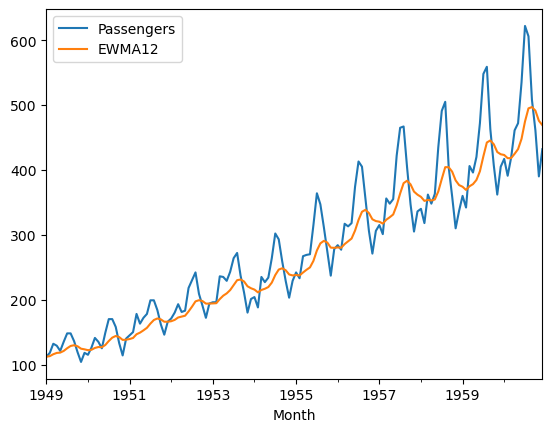

In [60]:
df_airline[['Passengers','EWMA12']].plot();

# Métodos de Holt-Winters

## SES (Simple Exponential Smooting)

In [72]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [73]:
span = 12
alpha = 2/(span+1)

In [91]:
df_airline['SES12'] = SimpleExpSmoothing(df_airline['Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [92]:
df_airline.head()

,Passengers,6-month-SMA,12-mont-SMA,EWMA12,SES12,DESadd12,DESmul12
Month,,,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000,114.102394,113.990701
1949-02-01,118,NaN,NaN,112.923077,112.923077,120.040657,120.031669
1949-03-01,132,NaN,NaN,115.857988,115.857988,134.001539,134.235979
1949-04-01,129,NaN,NaN,117.879836,117.879836,131.085845,131.270786
1949-05-01,121,NaN,NaN,118.359861,118.359861,123.110263,123.156267


## DES (Double Exponential Smoothing)

In [81]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [82]:
df_airline['DESadd12'] = ExponentialSmoothing(df_airline['Passengers'],trend='add').fit().fittedvalues.shift(-1)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [83]:
df_airline.head()

,Passengers,6-month-SMA,12-mont-SMA,EWMA12,SES12,DESadd12
Month,,,,,,
1949-01-01,112,NaN,NaN,112.000000,125.126290,114.102394
1949-02-01,118,NaN,NaN,112.923077,124.029937,120.040657
1949-03-01,132,NaN,NaN,115.857988,125.256101,134.001539
1949-04-01,129,NaN,NaN,117.879836,125.832085,131.085845
1949-05-01,121,NaN,NaN,118.359861,125.088688,123.110263


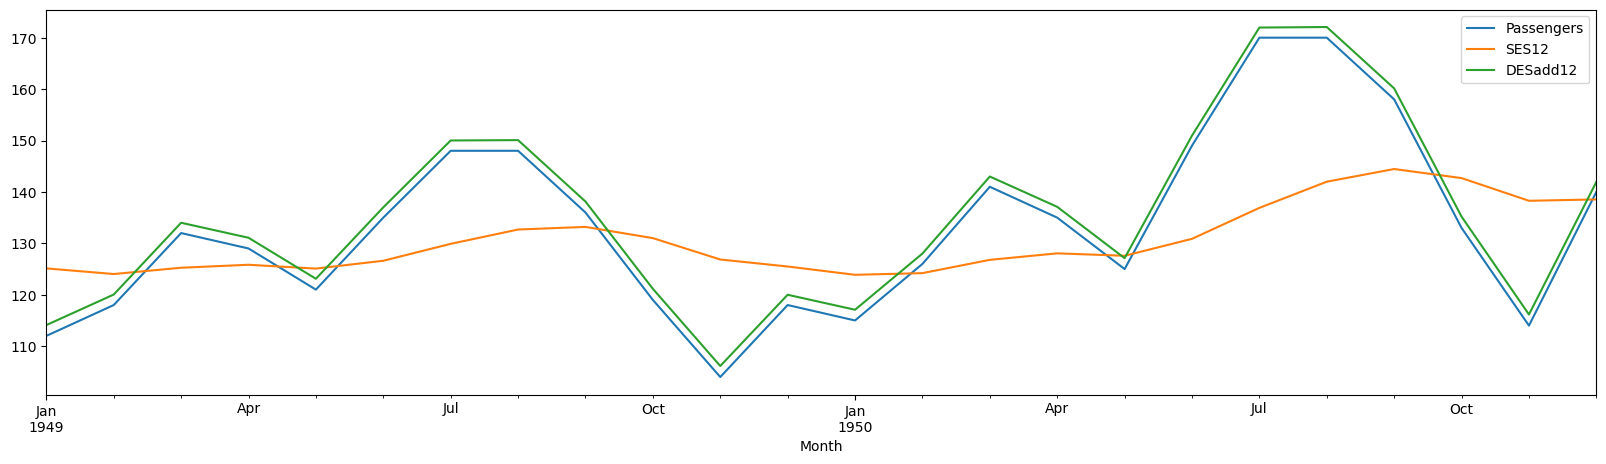

In [89]:
df_airline[['Passengers','SES12','DESadd12']].iloc[:24].plot(figsize=(20,5));

In [90]:
df_airline['DESmul12'] = ExponentialSmoothing(df_airline['Passengers'],trend='mul').fit().fittedvalues.shift(-1)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


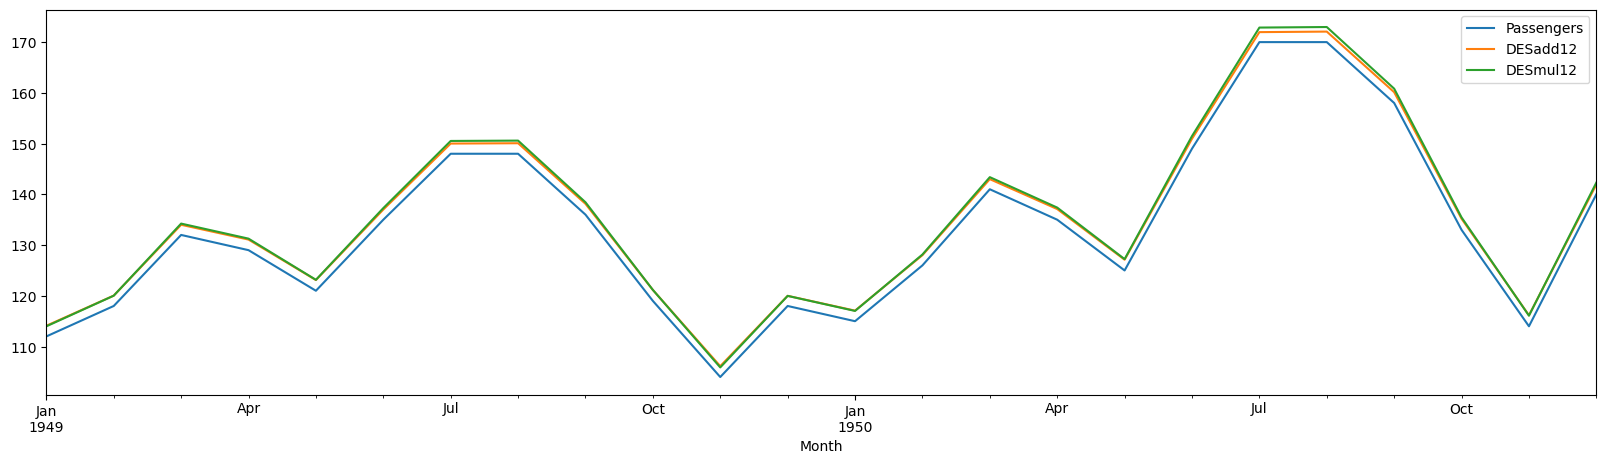

In [93]:
df_airline[['Passengers','DESadd12','DESmul12']].iloc[:24].plot(figsize=(20,5));

## TES (Triple Exponential Smoothing)

In [103]:
df_airline['TESadd12'] = ExponentialSmoothing(df_airline['Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


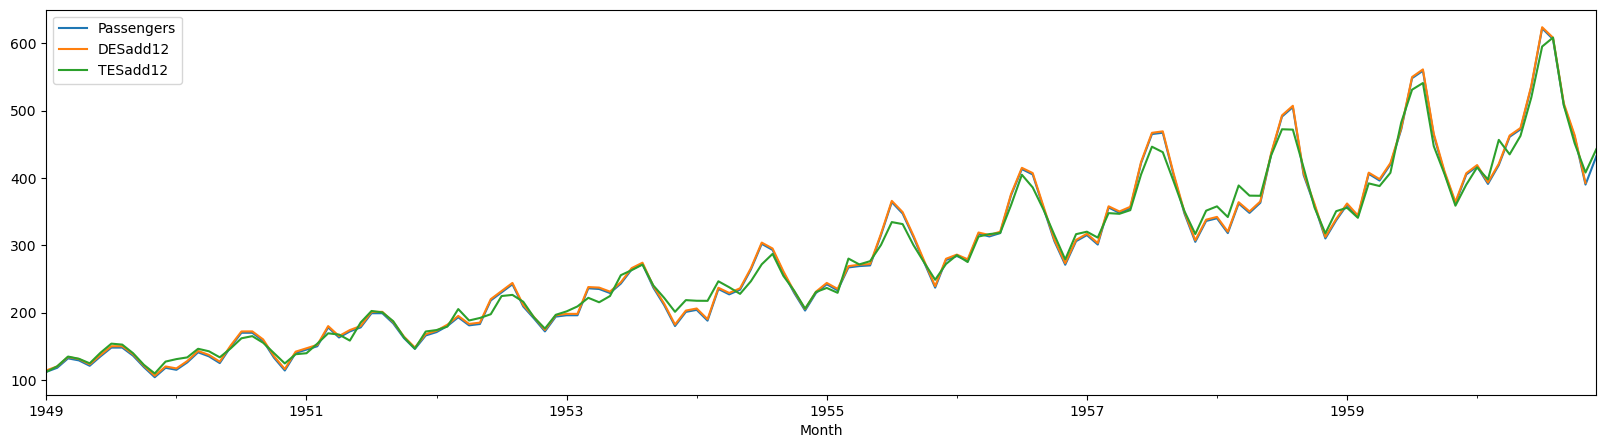

In [100]:
df_airline[['Passengers','DESadd12','TESadd12']].plot(figsize=(20,5));

In [104]:
df_airline['TESmul12'] = ExponentialSmoothing(df_airline['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


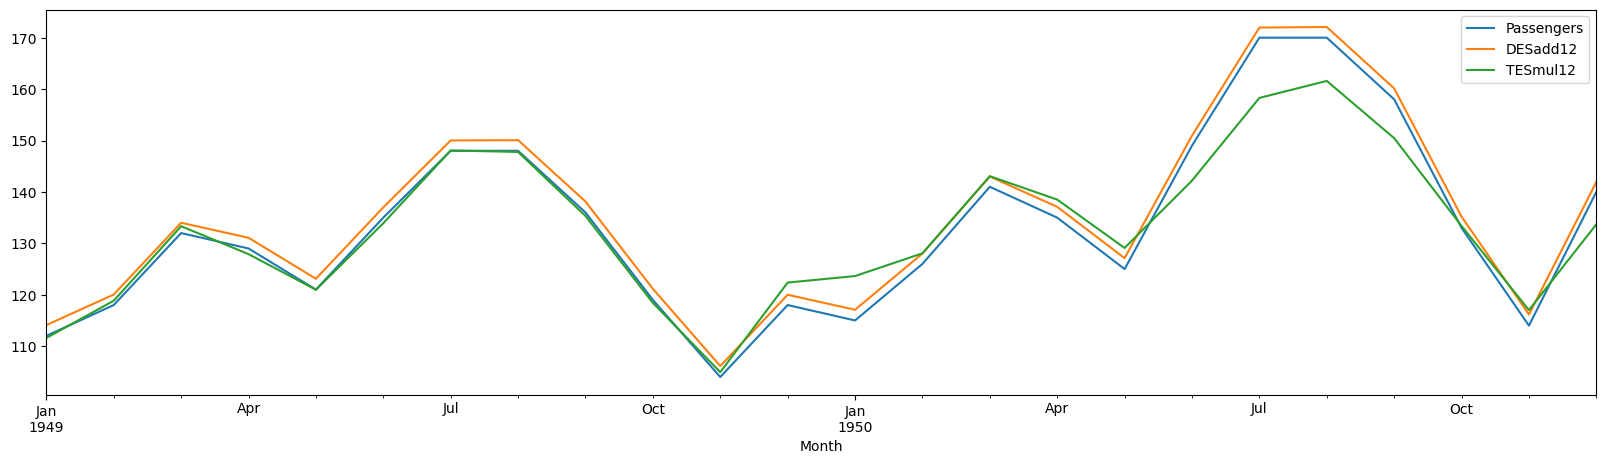

In [106]:
df_airline[['Passengers','DESadd12','TESmul12']].iloc[:24].plot(figsize=(20,5));

# Pronósticos (Forecasting)

In [110]:
df_airline_train_data = df_airline.iloc[0:108]
df_airline_test_data = df_airline.iloc[108:]

In [115]:
df_airline_fitted_model = ExponentialSmoothing(df_airline_train_data['Passengers'],trend='mul', seasonal='mul', seasonal_periods=12).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [116]:
df_airline_test_predictions = df_airline_fitted_model.forecast(36)

In [125]:
df_airline_test_predictions.head()

1958-01-01    356.968658
1958-02-01    344.588831
1958-03-01    405.718358
1958-04-01    400.610839
1958-05-01    409.001684
Freq: MS, dtype: float64

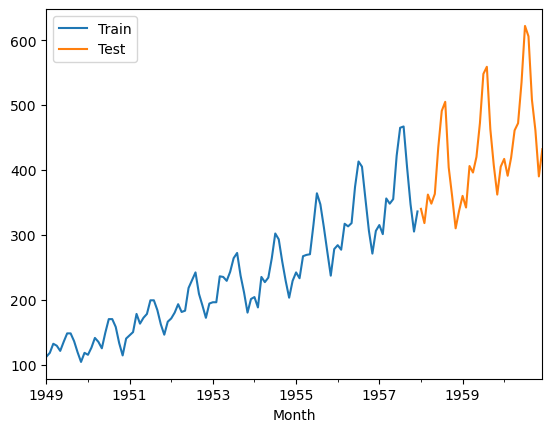

In [117]:
df_airline_train_data['Passengers'].plot(legend = True, label = 'Train')
df_airline_test_data['Passengers'].plot(legend = True, label = 'Test');

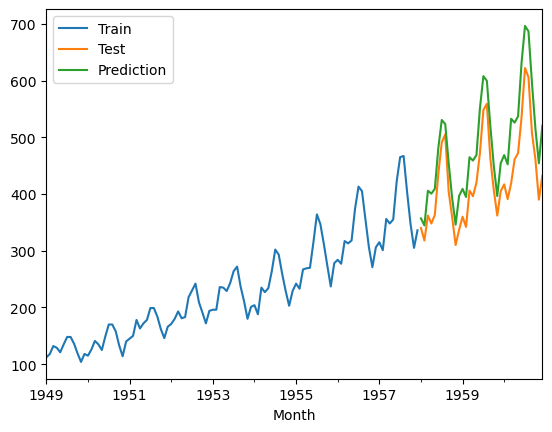

In [118]:
df_airline_train_data['Passengers'].plot(legend = True, label = 'Train')
df_airline_test_data['Passengers'].plot(legend = True, label = 'Test')
df_airline_test_predictions.plot(legend = True, label = 'Prediction');

In [119]:
df_airline_add_fitted_model = ExponentialSmoothing(df_airline_train_data['Passengers'],trend='add', seasonal='add', seasonal_periods=12).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [120]:
df_airline_add_test_predictions = df_airline_add_fitted_model.forecast(36)

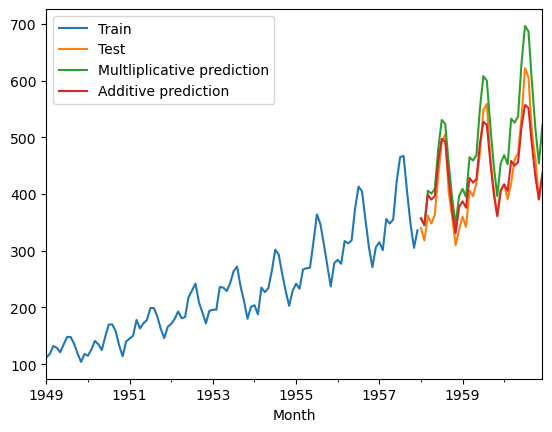

In [121]:
df_airline_train_data['Passengers'].plot(legend = True, label = 'Train')
df_airline_test_data['Passengers'].plot(legend = True, label = 'Test')
df_airline_test_predictions.plot(legend = True, label = 'Multliplicative prediction')
df_airline_add_test_predictions.plot(legend = True, label = 'Additive prediction');

# Métricas de evaluación

In [123]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [126]:
mean_absolute_error(df_airline_test_data['Passengers'],df_airline_test_predictions)

55.698326986164496

In [127]:
mean_absolute_error(df_airline_test_data['Passengers'],df_airline_add_test_predictions)

21.544775457219366

In [128]:
mean_squared_error(df_airline_test_data['Passengers'],df_airline_test_predictions)

3525.9322806129094

In [129]:
mean_squared_error(df_airline_test_data['Passengers'],df_airline_add_test_predictions)

695.676378388075

In [130]:
final_model = ExponentialSmoothing(df_airline['Passengers'],trend='add', seasonal='add', seasonal_periods=12).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [131]:
df_airline_predictions = final_model.forecast(36)

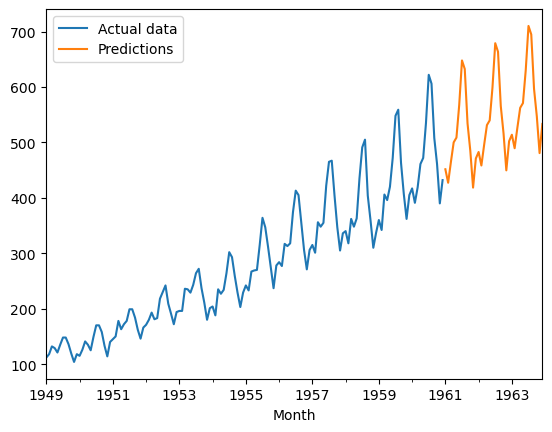

In [133]:
df_airline['Passengers'].plot(legend = True, label = 'Actual data')
df_airline_predictions.plot(legend = True, label = 'Predictions');

# Estacionaridad

In [134]:
sts.adfuller(df_yfinance['spx'])

(2.281479195675348,
 0.9989431160734881,
 32,
 7967,
 {'1%': -3.4311710629085694,
  '5%': -2.861902850768548,
  '10%': -2.5669631407781335},
 72470.1594504694)

In [135]:
sts.adfuller(df_yfinance['wn'])

(-87.81883649030398,
 0.0,
 0,
 7999,
 {'1%': -3.4311677771913693,
  '5%': -2.8619013989176083,
  '10%': -2.566962367942105},
 135127.61749098377)

In [137]:
sts.adfuller(df_yfinance['rw'])

(-0.44240107344619484,
 0.9027749924856581,
 0,
 7999,
 {'1%': -3.4311677771913693,
  '5%': -2.8619013989176083,
  '10%': -2.566962367942105},
 59267.001995229155)

In [139]:
sts.adfuller(df_ventas['Ventas'])

(-2.853928653615534,
 0.05097376463402474,
 13,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 6365.4145809406855)

# Funciones de autocorrelación y autocorrelación parcial

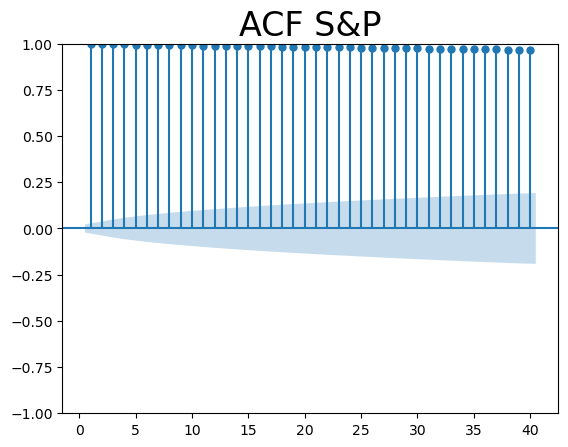

In [141]:
sgt.plot_acf(df_yfinance['spx'], lags = 40, zero = False)
plt.title('ACF S&P', size = 24)
plt.show()

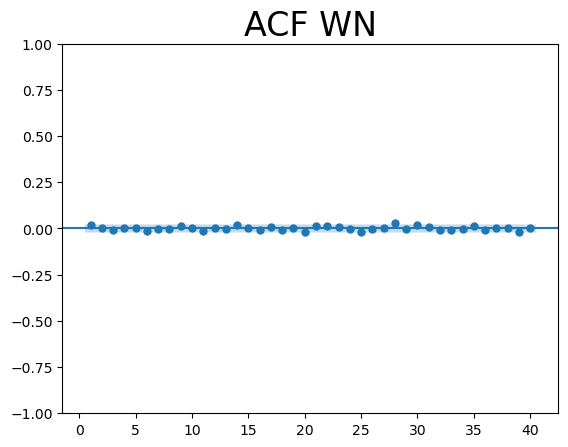

In [142]:
sgt.plot_acf(df_yfinance['wn'], lags = 40, zero = False)
plt.title('ACF WN', size = 24)
plt.show()

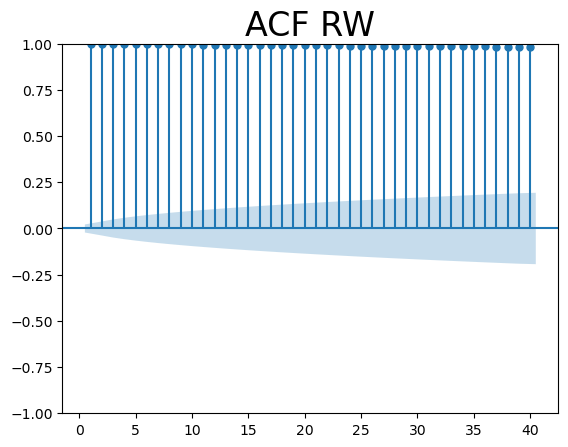

In [143]:
sgt.plot_acf(df_yfinance['rw'], lags = 40, zero = False)
plt.title('ACF RW', size = 24)
plt.show()

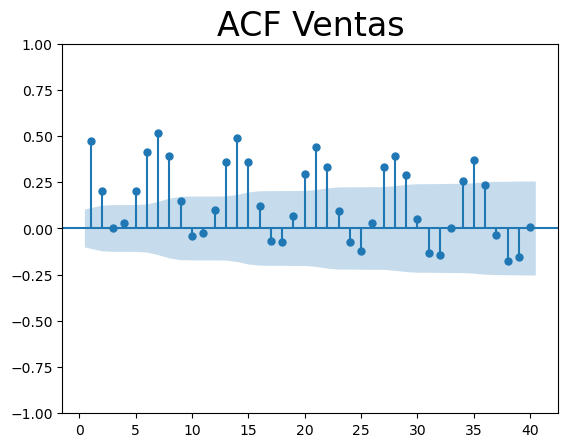

In [144]:
sgt.plot_acf(df_ventas['Ventas'], lags = 40, zero = False)
plt.title("ACF Ventas", size = 24)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


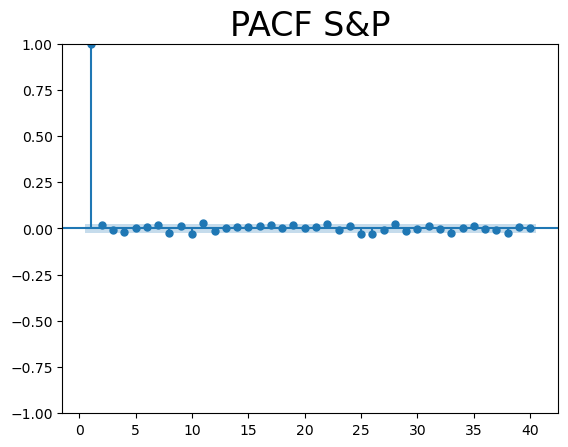

In [145]:
sgt.plot_pacf(df_yfinance['spx'], lags = 40, zero = False)
plt.title('PACF S&P', size = 24)
plt.show()

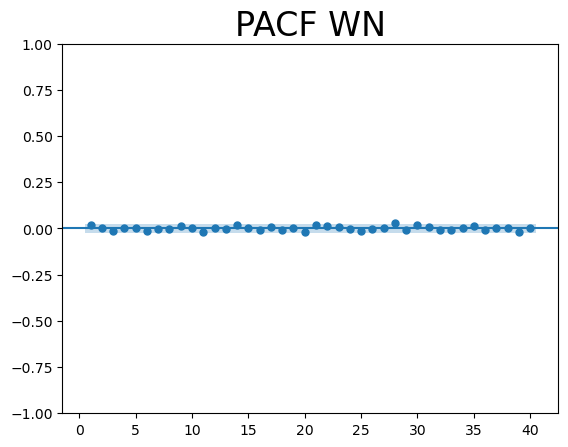

In [147]:
sgt.plot_pacf(df_yfinance['wn'], lags = 40, zero = False)
plt.title('PACF WN', size = 24)
plt.show()

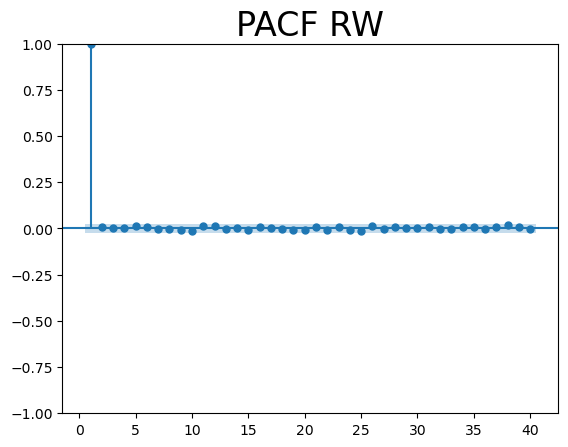

In [148]:
sgt.plot_pacf(df_yfinance['rw'], lags = 40, zero = False)
plt.title('PACF RW', size = 24)
plt.show()

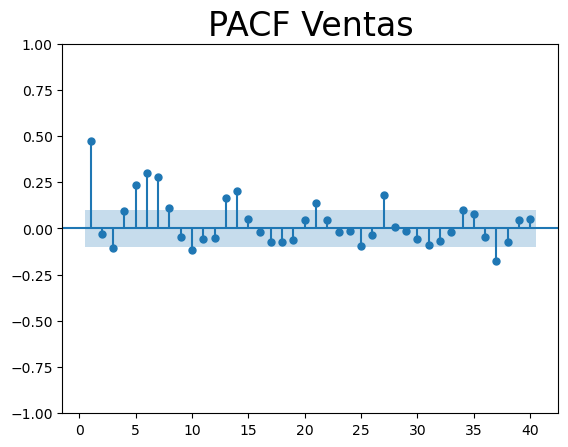

In [149]:
sgt.plot_pacf(df_ventas['Ventas'], lags = 40, zero = False)
plt.title("PACF Ventas", size = 24)
plt.show()